In [ ]:
import cv2
from PIL import Image
from IPython.display import display, clear_output

import numpy as np

In [ ]:
# define a video capture object
vid = cv2.VideoCapture(0)

# Capture the video frame by frame
ret, frame = vid.read()

# Display the resulting frame
image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
display(Image.fromarray(image))
# Cleanup the cap object
vid.release()



(720, 1280, 3)


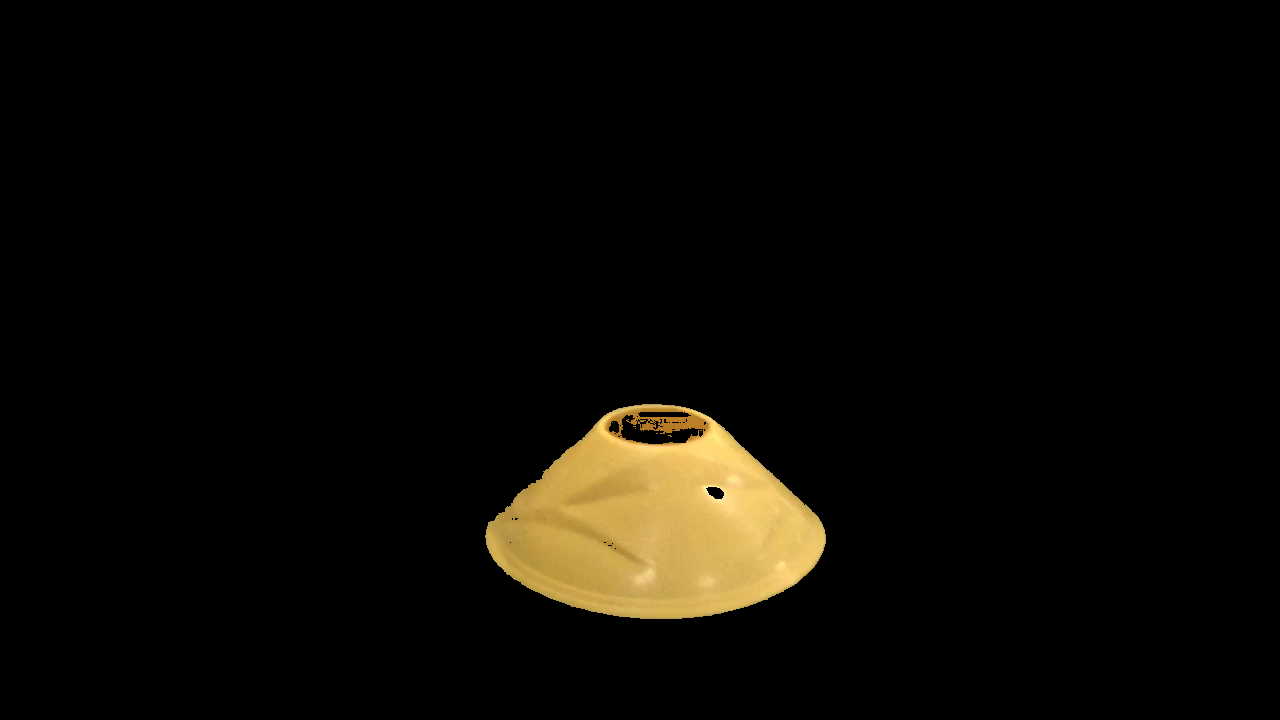

In [89]:
# Now we have our image, let's actually find some things in it. First, apply the color mask.
print(np.shape(image))  # Print the img variable dimension
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

red_lower = (18,85,175)
red_upper = (55,255,255)

mask = cv2.inRange(hsv, red_lower, red_upper)

imageMask = mask > 0

yellowLayer = np.zeros_like(image, np.uint8)
yellowLayer[imageMask] = image[imageMask]

display(Image.fromarray(yellowLayer))


[[404 642]
 [618 681]]


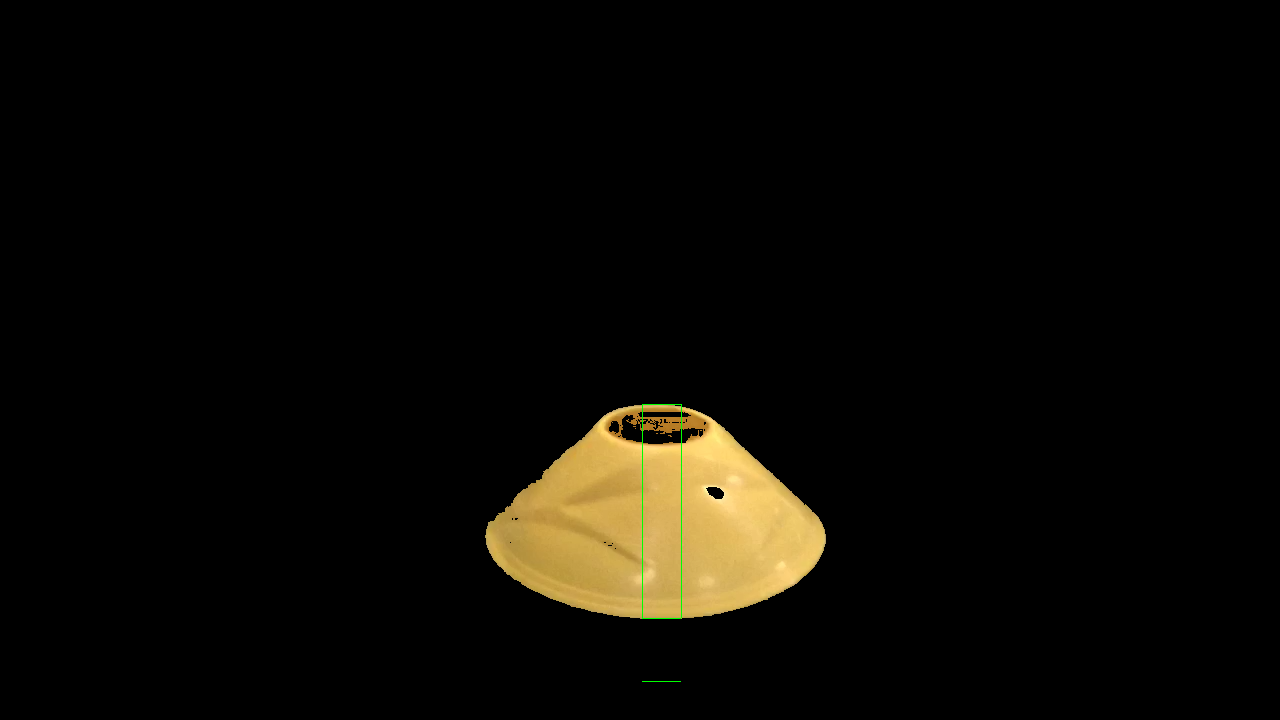

In [93]:
idx1 = np.nonzero(imageMask.ravel()==1)[0]
outputArr = np.column_stack(
  np.unravel_index(
    [idx1.min(), idx1.max()],
    imageMask.shape
  )
)
print(outputArr)
# print(yellowLayer)
# Leftmost Vert
for i in range(outputArr[0][0], outputArr[1][0]):
  yellowLayer[i][outputArr[0][1]] = [0,255,0]

# Top Horizontal
for i in range(outputArr[0][1], outputArr[1][1]):
  yellowLayer[outputArr[0][0]][i] = [0,255,0]

# Rightmost Vert
for i in range(outputArr[0][0], outputArr[1][0]):
  yellowLayer[i][outputArr[1][1]] = [0,255,0]

# Bottom Horizontal
for i in range(outputArr[0][1], outputArr[1][1]):
  yellowLayer[outputArr[1][0]][i] = [0,255,0]

display(Image.fromarray(yellowLayer))

In [ ]:
# Set the Lower range value of color in BGR
lower_range = np.array([0,0,0])

# Set the Upper range value of color in BGR
r = 253
g = 241
b = 91
upper_range = np.array([b,g,r])

path = r'/Users/carbon/Desktop/COLOUR-WHEEL.jpg'
wheel = cv2.imread(path)

# Create a mask with range
mask = cv2.inRange(wheel,lower_range,upper_range)

# Performing bitwise and operation with mask in img variable
result = cv2.bitwise_and(wheel,wheel,mask = mask)

display(Image.fromarray(result))
